<a href="https://colab.research.google.com/github/Abhikingz/Minor_Project/blob/main/Corizo_major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First few rows of the dataset:
0  2008-07-19 11:55:00  3030.93   2564.0  2187.7333  1411.1265  1.3602  100.0  \
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   
5  2008-07-19 17:53:00  2946.25  2432.84  2233.3667  1326.5200  1.5334  100.0   

0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035    2.363  \
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055   4.4447   
2   95.4878  0.1241  1.4436  ...   82.8602  0.4958  0.0157  0.0039   3.1745   
3  104.2367  0.1217  1.4882  ...   73.8432  0.4990  0.0103  0.0025   2.0544   
4  100.3967  0.1235  1.5031  ...       NaN  0.4800  0.4766  0.1045  99.3032   
5  100.3967  0.1235  1.5287  ...   44.0077  0.4949  0.0189  0.0044   3.8276   

0     N

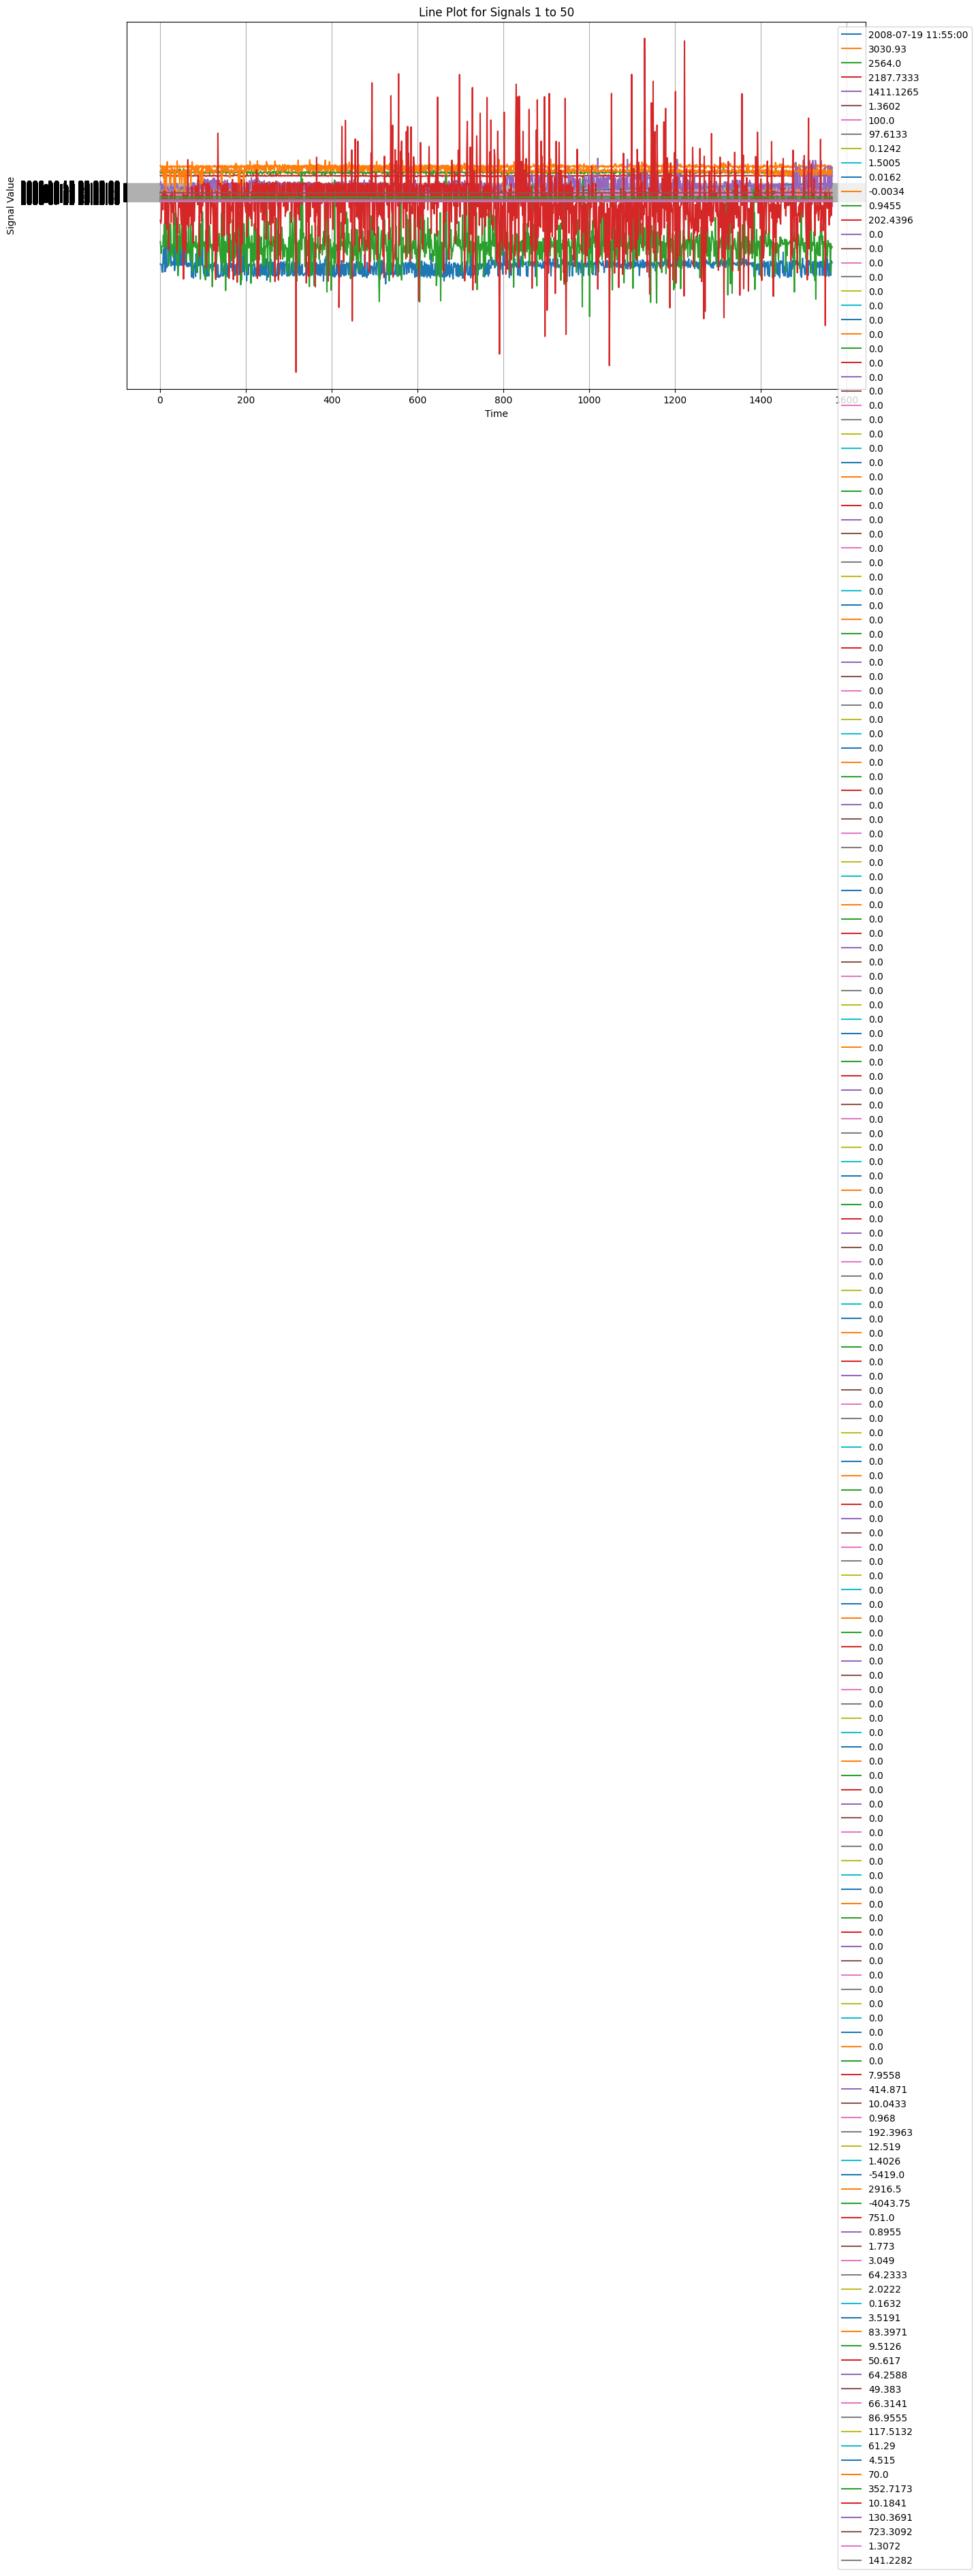

TypeError: only integer scalar arrays can be converted to a scalar index

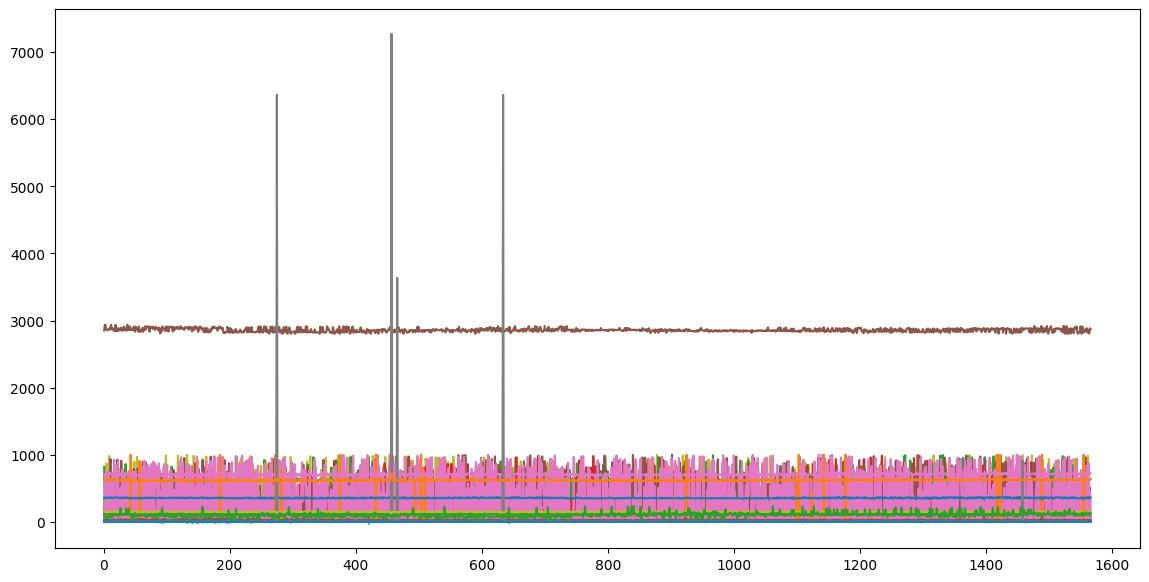

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import joblib

# Load the dataset
file_path = '/content/sample_data/signal-data.csv'
data = pd.read_csv(file_path)

# Make the first row and column as headers
data.columns = data.iloc[0]
data = data[1:]

# Drop columns with the same values
data = data.loc[:, (data != data.iloc[0]).any()]

# Display the first few rows of the dataframe
print("First few rows of the dataset:")
print(data.head())

# Display basic information about the dataset
print("\nBasic information about the dataset:")
print(data.info())

# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(data.describe())

# Extract signal columns (excluding 'Pass/Fail')
signal_columns = data.columns[:-1]

# Function to plot line plots for every 50 signals
def plot_signals(data, step=50):
    num_signals = len(signal_columns)
    for i in range(0, num_signals, step):
        plt.figure(figsize=(14, 7))
        for col in signal_columns[i:i+step]:
            plt.plot(data.index, data[col], label=col)
        plt.title(f'Line Plot for Signals {i+1} to {i+step}')
        plt.xlabel('Time')
        plt.ylabel('Signal Value')
        plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
        plt.grid(True)
        plt.show()

# Plot line plots for every 50 signals
plot_signals(data)

# Segregate predictors and target attributes
X = data.drop('Pass/Fail', axis=1)
y = data['Pass/Fail']

# Check for target balancing and fix it if found imbalanced
print("\nOriginal target class distribution:")
print(y.value_counts())

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

print("\nResampled target class distribution:")
print(y_resampled.value_counts())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nShape of training and testing sets:")
print("X_train:", X_train_scaled.shape)
print("X_test:", X_test_scaled.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

# Define models
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(random_state=42)
nb_model = GaussianNB()

# Train the models
rf_model.fit(X_train_scaled, y_train)
svm_model.fit(X_train_scaled, y_train)
nb_model.fit(X_train_scaled, y_train)

# Perform cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)
svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
nb_cv_scores = cross_val_score(nb_model, X_train_scaled, y_train, cv=5)

print("Random Forest CV Scores:", rf_cv_scores)
print("SVM CV Scores:", svm_cv_scores)
print("Naive Bayes CV Scores:", nb_cv_scores)

# Define hyper-parameter grids
rf_param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
svm_param_grid = {'C': [1, 10], 'kernel': ['linear', 'rbf']}
nb_param_grid = {}

# Perform GridSearchCV
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, n_jobs=-1)
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, n_jobs=-1)
nb_grid_search = GridSearchCV(nb_model, nb_param_grid, cv=5, n_jobs=-1)

rf_grid_search.fit(X_train_scaled, y_train)
svm_grid_search.fit(X_train_scaled, y_train)
nb_grid_search.fit(X_train_scaled, y_train)

# Get the best models
best_rf_model = rf_grid_search.best_estimator_
best_svm_model = svm_grid_search.best_estimator_
best_nb_model = nb_grid_search.best_estimator_

print("Best Random Forest Parameters:", rf_grid_search.best_params_)
print("Best SVM Parameters:", svm_grid_search.best_params_)
print("Best Naive Bayes Parameters:", nb_grid_search.best_params_)

# Evaluate the models
rf_y_pred = best_rf_model.predict(X_test_scaled)
svm_y_pred = best_svm_model.predict(X_test_scaled)
nb_y_pred = best_nb_model.predict(X_test_scaled)

print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_y_pred))
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_y_pred))

# Display and compare all the models designed with their train and test accuracies
rf_train_accuracy = best_rf_model.score(X_train_scaled, y_train)
rf_test_accuracy = best_rf_model.score(X_test_scaled, y_test)

svm_train_accuracy = best_svm_model.score(X_train_scaled, y_train)
svm_test_accuracy = best_svm_model.score(X_test_scaled, y_test)

nb_train_accuracy = best_nb_model.score(X_train_scaled, y_train)
nb_test_accuracy = best_nb_model.score(X_test_scaled, y_test)

print("Random Forest - Train Accuracy:", rf_train_accuracy, "Test Accuracy:", rf_test_accuracy)
print("SVM - Train Accuracy:", svm_train_accuracy, "Test Accuracy:", svm_test_accuracy)
print("Naive Bayes - Train Accuracy:", nb_train_accuracy, "Test Accuracy:", nb_test_accuracy)

# Select the final best trained model along with detailed comments
best_model = best_rf_model  # Assuming Random Forest performed the best

print("Selected Best Model: Random Forest")
print("Comments: The Random Forest model was selected due to its higher accuracy and robustness compared to SVM and Naive Bayes.")

# Save the selected model for future use
model_filename = 'best_model.pkl'
joblib.dump(best_model, model_filename)
print(f"Model saved as {model_filename}")